In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [96]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [97]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [98]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [100]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [101]:
data.shape

(374, 13)

In [102]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [103]:
data = data.drop(columns=["Sleep Disorder"])

In [104]:
data.shape

(374, 12)

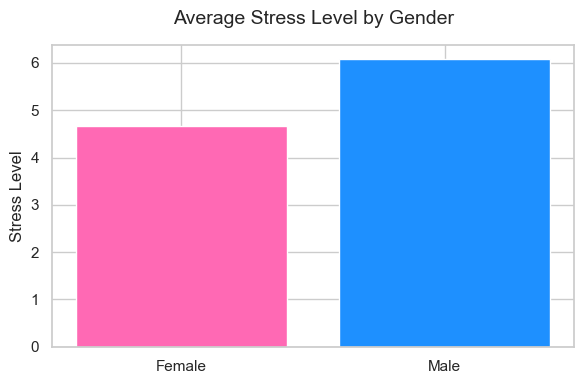

In [146]:
g = data.groupby("Gender")["Stress Level"].mean()

plt.figure(figsize=(6,4))
plt.bar(g.index, g.values, color=["hotpink", "dodgerblue"])
plt.title("Average Stress Level by Gender", fontsize=14, pad=15)
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

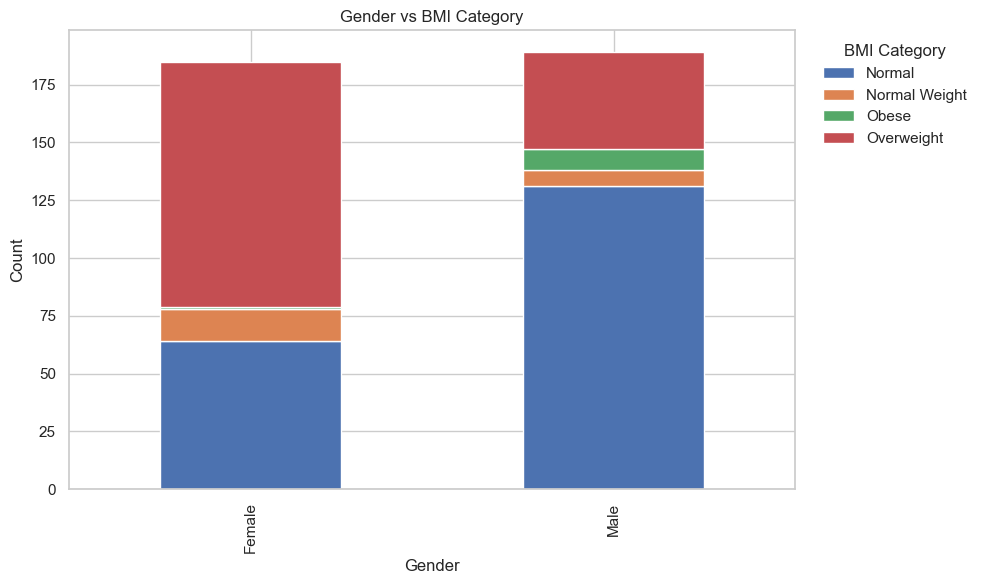

In [128]:
g_bmi = pd.crosstab(data["Gender"], data["BMI Category"])
ax = g_bmi.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Gender vs BMI Category")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.legend(
    title="BMI Category",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),   
    frameon=False
)

plt.tight_layout()
plt.show()

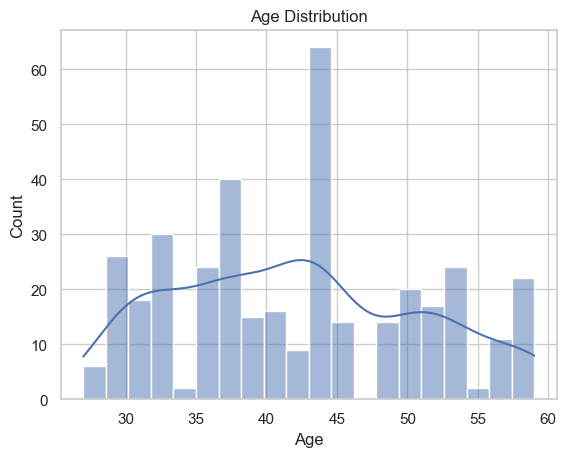

In [108]:
sns.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

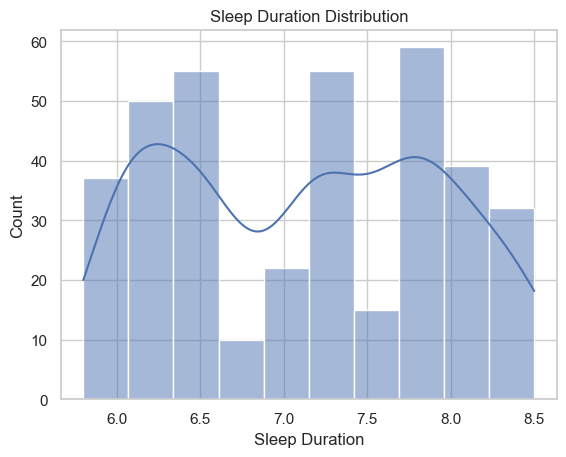

In [109]:
sns.histplot(data["Sleep Duration"], kde=True)
plt.title("Sleep Duration Distribution")
plt.show()

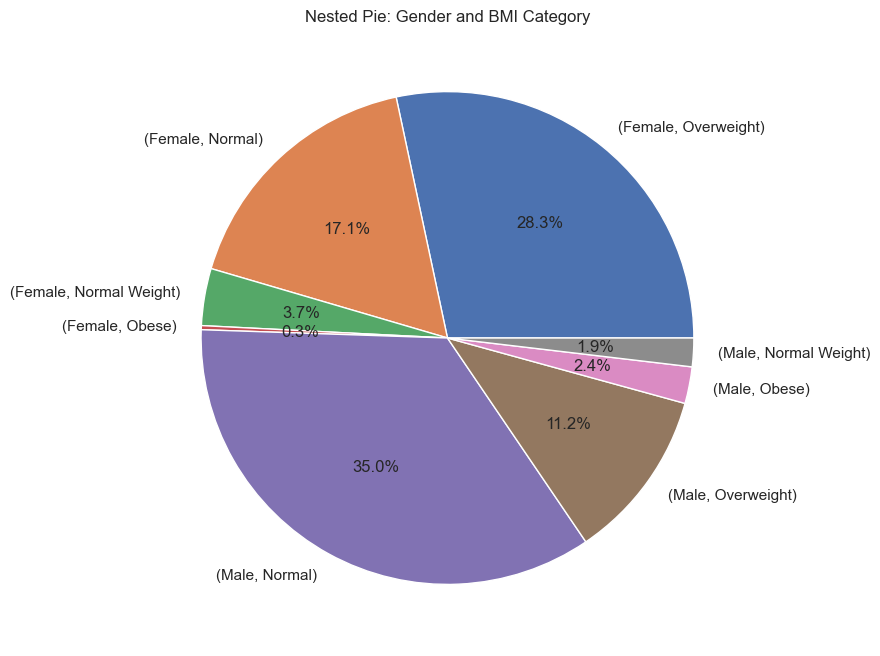

In [110]:
bmi_counts = data.groupby("Gender")["BMI Category"].value_counts()

plt.figure(figsize=(8,8))
bmi_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Nested Pie: Gender and BMI Category")
plt.ylabel("")
plt.show()

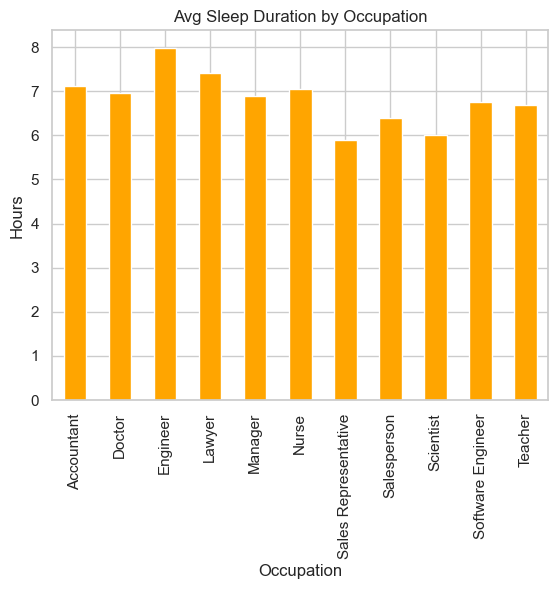

In [111]:
data.groupby("Occupation")["Sleep Duration"].mean().plot(kind="bar", color="orange")
plt.title("Avg Sleep Duration by Occupation")
plt.ylabel("Hours")
plt.show()

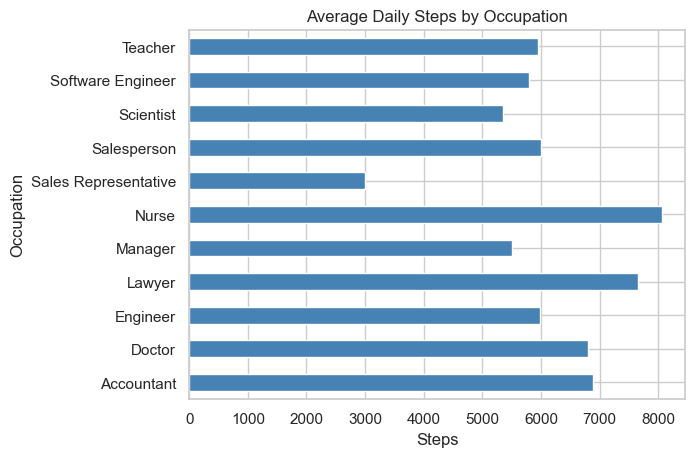

In [112]:
data.groupby("Occupation")["Daily Steps"].mean().plot(kind="barh", color="steelblue")
plt.title("Average Daily Steps by Occupation")
plt.xlabel("Steps")
plt.show()

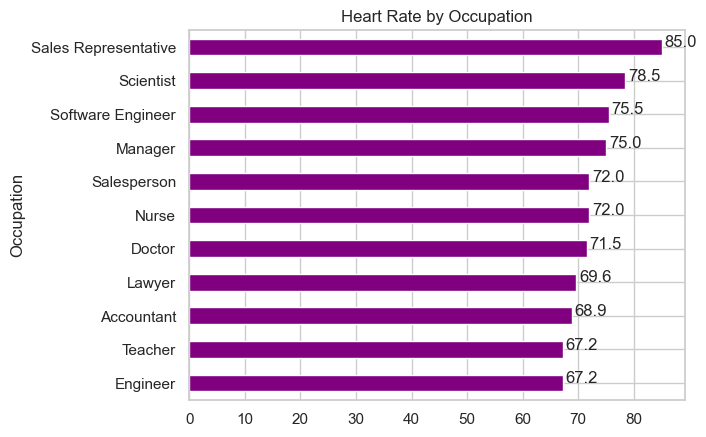

In [113]:
h = data.groupby("Occupation")["Heart Rate"].mean().sort_values()
ax = h.plot(kind="barh", color="purple")
plt.title("Heart Rate by Occupation")
for i, v in enumerate(h.values):
    ax.annotate(f"{v:.1f}", (v + 0.5, i))
plt.show()

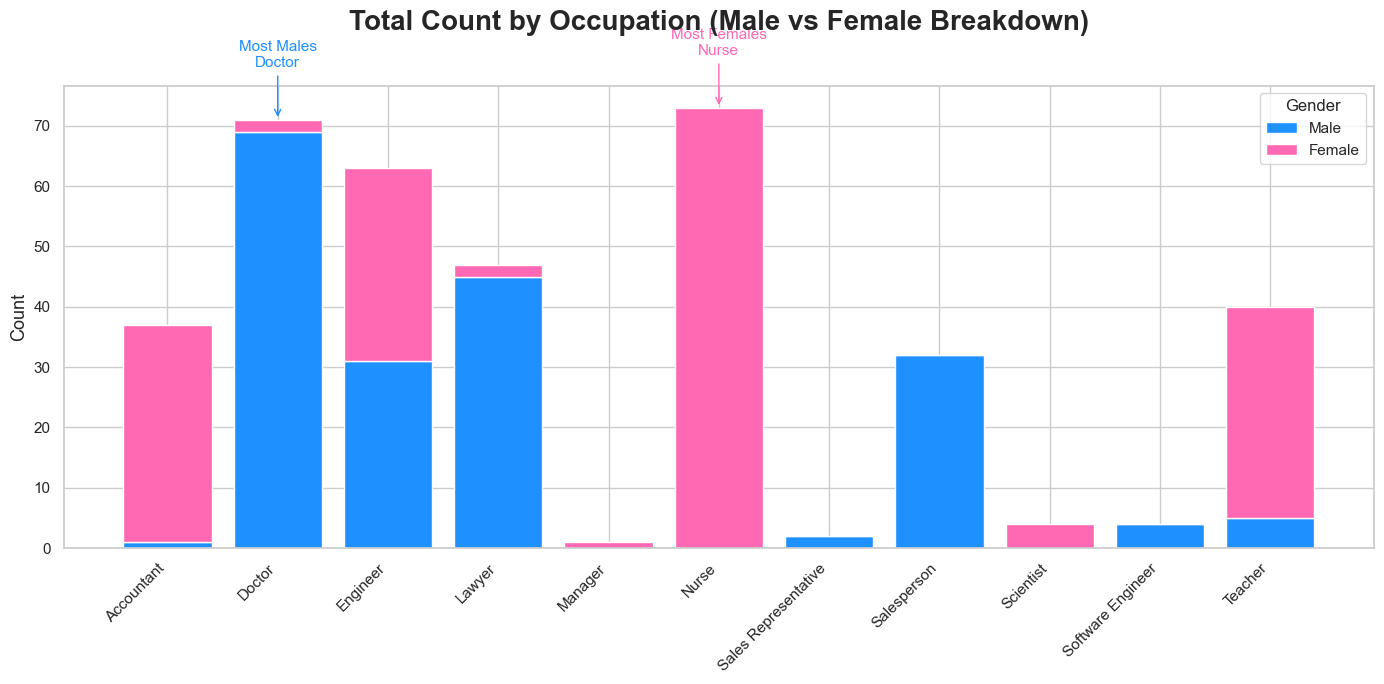

In [114]:
counts = data.groupby(["Occupation", "Gender"]).size().unstack(fill_value=0)

totals = counts.sum(axis=1)
gender_colors = {
    "Male": "dodgerblue",
    "Female": "hotpink"
}
plt.figure(figsize=(14,7))

plt.bar(totals.index, counts["Male"], color=gender_colors["Male"], label="Male")
plt.bar(totals.index, counts["Female"], bottom=counts["Male"], 
        color=gender_colors["Female"], label="Female")

plt.title(
    "Total Count by Occupation (Male vs Female Breakdown)",
    fontsize=20,
    pad=40,
    fontweight="bold"
)

plt.ylabel("Count", fontsize=13)
plt.xticks(rotation=45, ha="right")

max_male_occ = counts["Male"].idxmax()
max_female_occ = counts["Female"].idxmax()

def annotate_group(label, occ, color):
    x = list(totals.index).index(occ)
    y = totals[occ]
    plt.annotate(
        f"{label}\n{occ}",
        xy=(x, y),
        xytext=(x, y + totals.max() * 0.12),
        arrowprops=dict(arrowstyle="->", color=color),
        ha="center",
        fontsize=11,
        color=color
    )

annotate_group("Most Males", max_male_occ, gender_colors["Male"])
annotate_group("Most Females", max_female_occ, gender_colors["Female"])

plt.legend(title="Gender", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_15953/2917426009.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = data.groupby("Age Group")[["Sleep Duration","Stress Level","Physical Activity Level"]].mean()


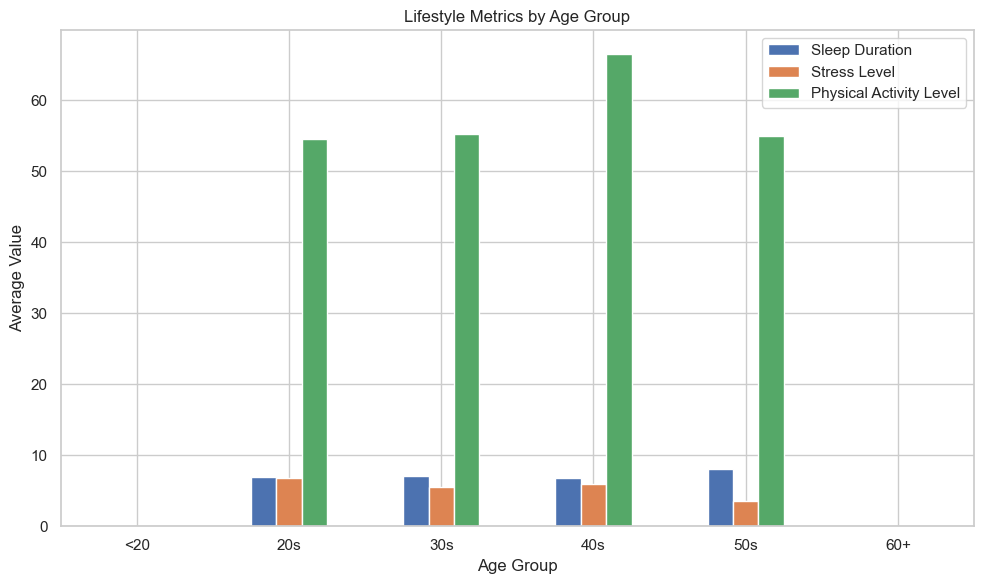

In [140]:
data["Age Group"] = pd.cut(
    data["Age"],
    bins=[0,20,30,40,50,60,120],
    labels=["<20","20s","30s","40s","50s","60+"]
)
agg = data.groupby("Age Group")[["Sleep Duration","Stress Level","Physical Activity Level"]].mean()

agg.plot(kind="bar", figsize=(10,6))
plt.title("Lifestyle Metrics by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

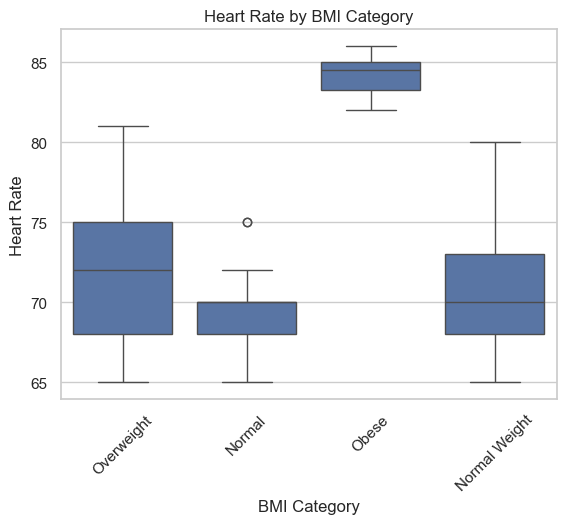

In [115]:
sns.boxplot(data=data, x="BMI Category", y="Heart Rate")
plt.title("Heart Rate by BMI Category")
plt.xticks(rotation=45)
plt.show()

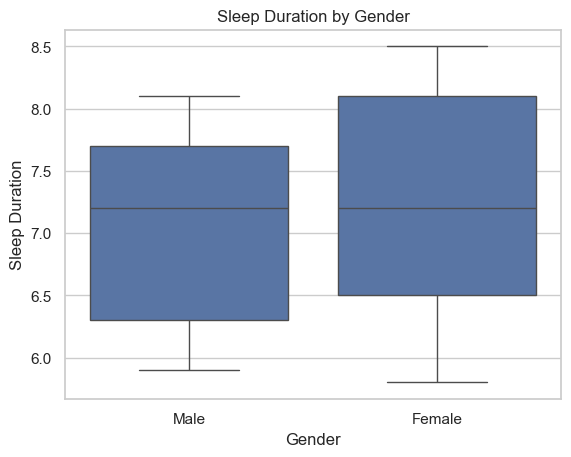

In [116]:
sns.boxplot(data=data, x="Gender", y="Sleep Duration")
plt.title("Sleep Duration by Gender")
plt.show()

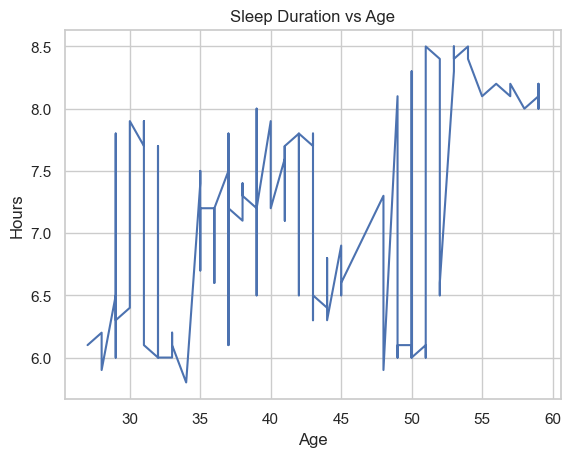

In [117]:
df_sorted = data.sort_values("Age")
plt.plot(df_sorted["Age"], df_sorted["Sleep Duration"])
plt.title("Sleep Duration vs Age")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_15953/1712525076.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sleep_counts = data.pivot_table(


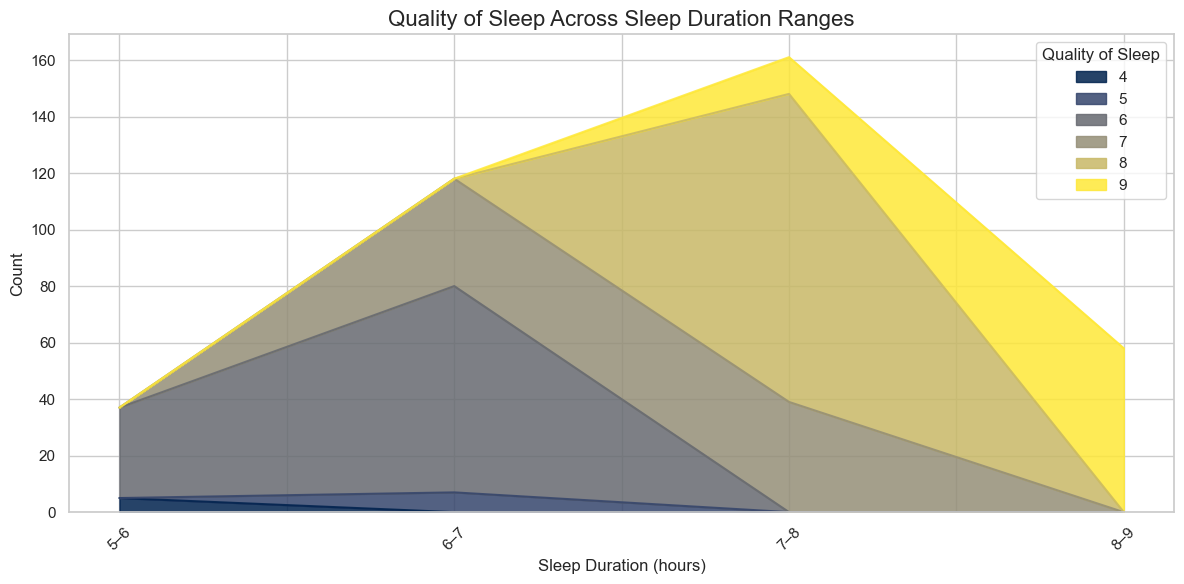

In [119]:
data["Sleep Duration Bins"] = pd.cut(
    data["Sleep Duration"],
    bins=[5, 6, 7, 8, 9],
    labels=["5–6", "6–7", "7–8", "8–9"],
    include_lowest=True
)

sleep_counts = data.pivot_table(
    index="Sleep Duration Bins",
    columns="Quality of Sleep",
    aggfunc="size",
    fill_value=0
)

sleep_counts.plot.area(
    figsize=(12, 6),
    cmap="cividis",
    alpha=0.85
)

plt.title("Quality of Sleep Across Sleep Duration Ranges", fontsize=16)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

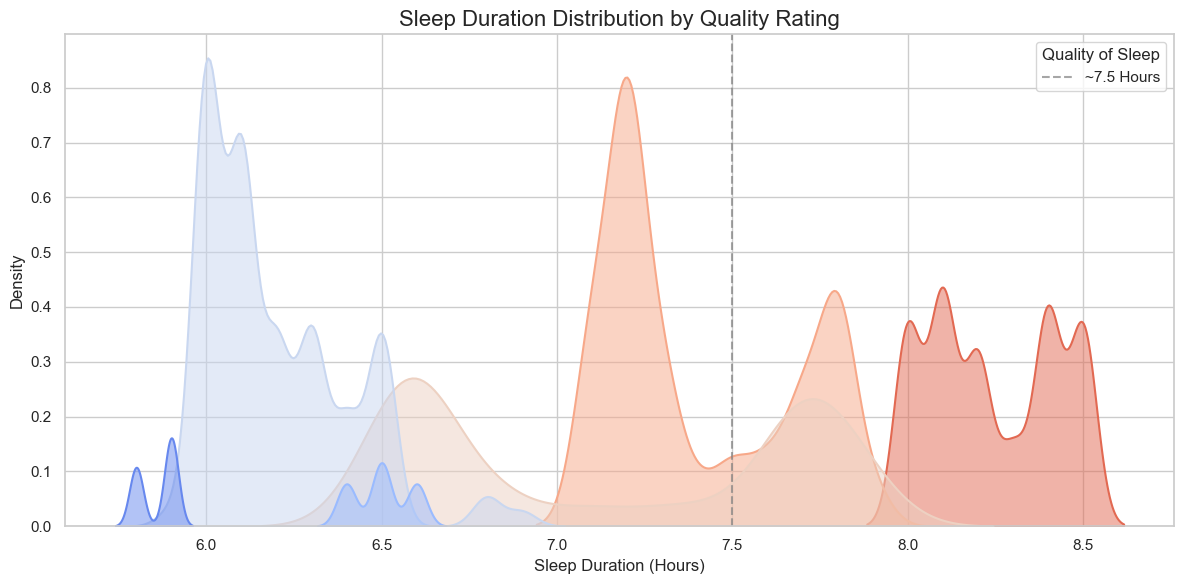

In [120]:
data['Quality of Sleep'] = data['Quality of Sleep'].astype('category')

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.kdeplot(
    data=data,
    x="Sleep Duration",
    hue="Quality of Sleep",
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    bw_adjust=0.5,
    palette="coolwarm"
)

plt.title("Sleep Duration Distribution by Quality Rating", fontsize=16)
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Density")
plt.axvline(x=7.5, color='gray', linestyle='--', alpha=0.7, label='~7.5 Hours')

plt.legend(title="Quality of Sleep")
plt.tight_layout()
plt.show()

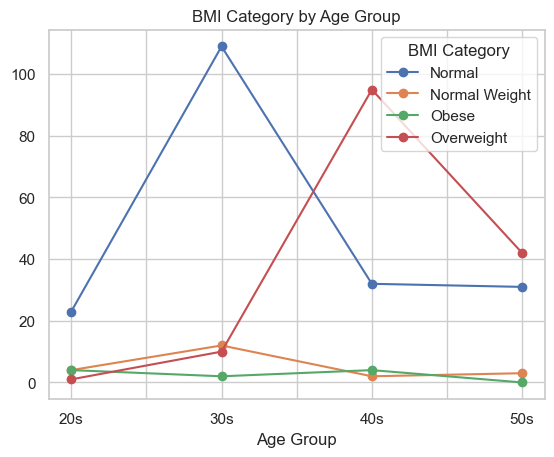

In [121]:
bmi_counts = pd.crosstab(data["Age Group"], data["BMI Category"])
bmi_counts.plot(kind="line", marker="o")
plt.title("BMI Category by Age Group")
plt.show()

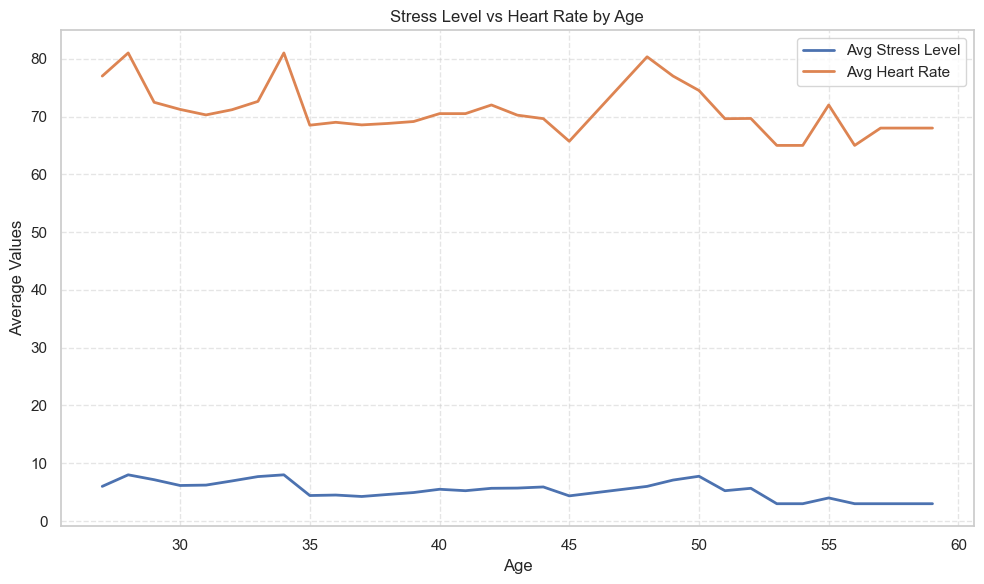

In [122]:
age_grouped3 = data.groupby("Age")[["Stress Level", "Heart Rate"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_grouped3["Age"], age_grouped3["Stress Level"], label="Avg Stress Level", linewidth=2)
plt.plot(age_grouped3["Age"], age_grouped3["Heart Rate"], label="Avg Heart Rate", linewidth=2)

plt.title("Stress Level vs Heart Rate by Age")
plt.xlabel("Age")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

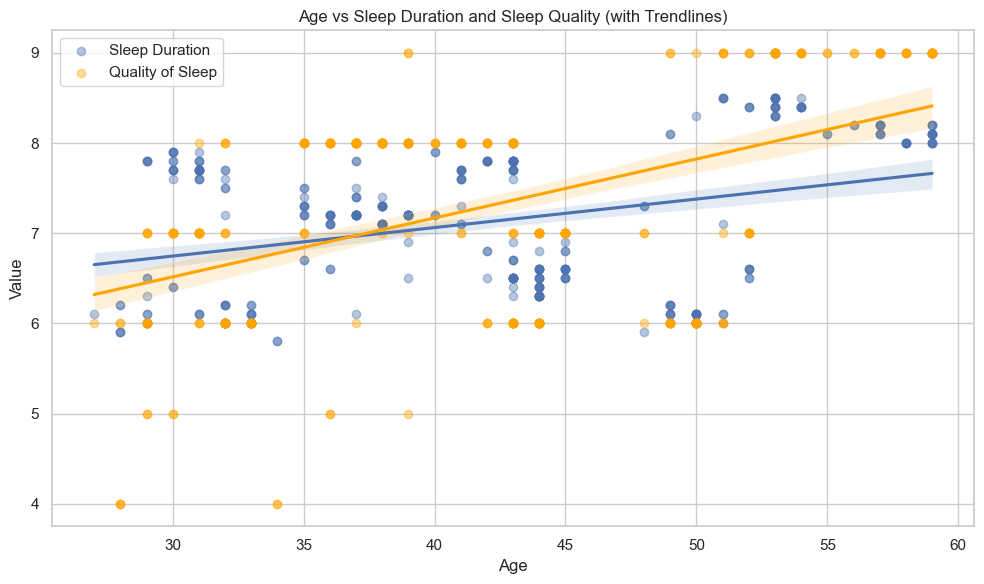

In [131]:
plt.figure(figsize=(10,6))

sns.regplot(
    data=data,
    x="Age",
    y="Sleep Duration",
    scatter_kws={"alpha":0.4},
    label="Sleep Duration"
)

sns.regplot(
    data=data,
    x="Age",
    y="Quality of Sleep",
    scatter_kws={"alpha":0.4},
    label="Quality of Sleep",
    color="orange"
)

plt.title("Age vs Sleep Duration and Sleep Quality (with Trendlines)")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

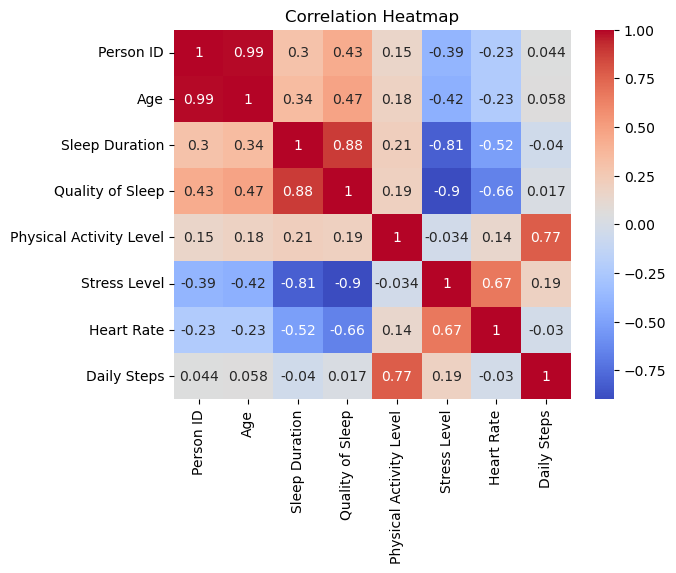

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

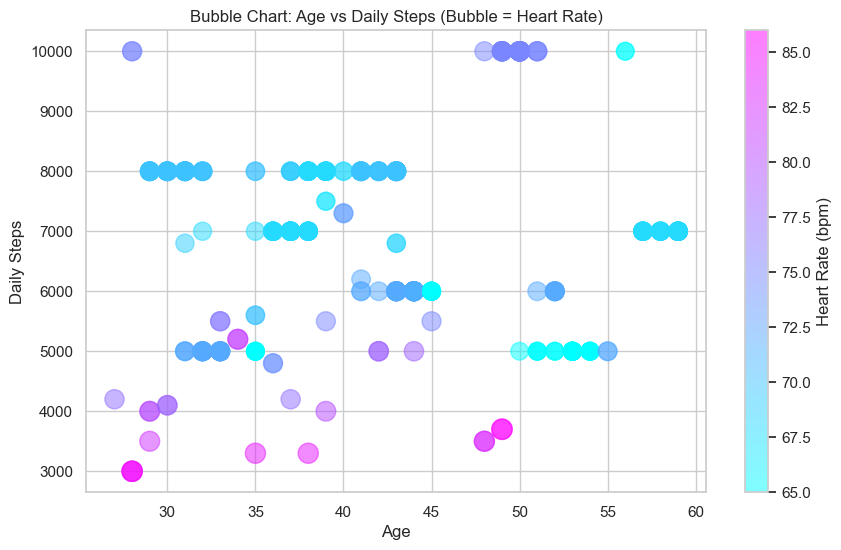

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(
    data["Age"],
    data["Daily Steps"],
    s=data["Heart Rate"] * 2.5,      # bubble size from heart rate
    c=data["Heart Rate"],            # bubble color from heart rate
    cmap="cool",
    alpha=0.5
)

plt.title("Bubble Chart: Age vs Daily Steps (Bubble = Heart Rate)")
plt.xlabel("Age")
plt.ylabel("Daily Steps")
plt.colorbar(label="Heart Rate (bpm)")
plt.show()

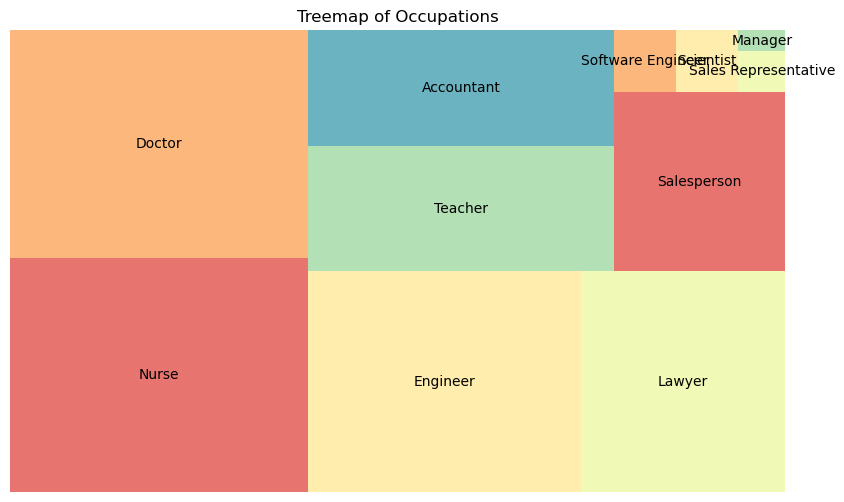

In [ ]:
import squarify

counts = data["Occupation"].value_counts()
plt.figure(figsize=(10,6))
squarify.plot(sizes=counts.values, label=counts.index, alpha=0.8, color=sns.color_palette("Spectral"))
plt.title("Treemap of Occupations")
plt.axis("off")
plt.show()

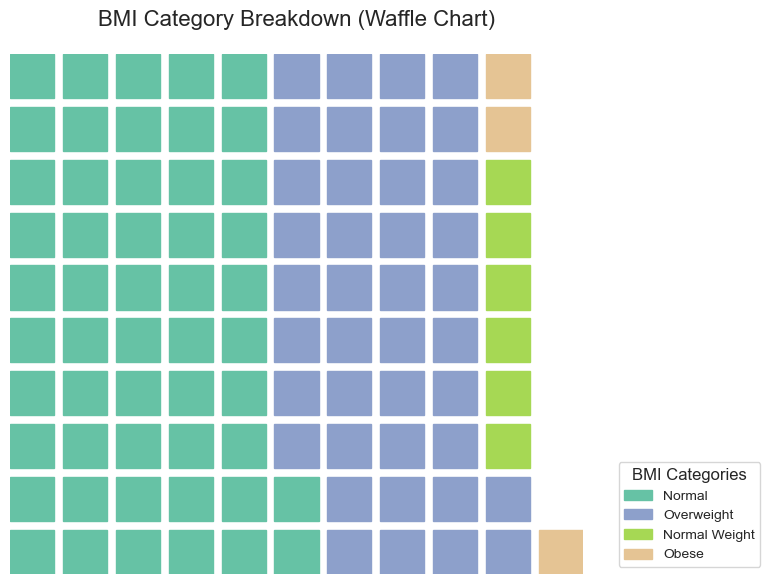

In [ ]:
from pywaffle import Waffle
import matplotlib.cm as cm

bmi_data = data["BMI Category"].value_counts(normalize=True).sort_values(ascending=False) * 100

num_categories = len(bmi_data)
colors = [cm.Set2(i / num_categories) for i in range(num_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=bmi_data.to_dict(),
    colors=colors,
    legend={
        "loc": "lower left",
        "bbox_to_anchor": (1.05, 0),
        "fontsize": 10,
        "title": "BMI Categories"
    },
    figsize=(10, 6)
)

plt.title("BMI Category Breakdown (Waffle Chart)", fontsize=16, pad=20)
plt.show()

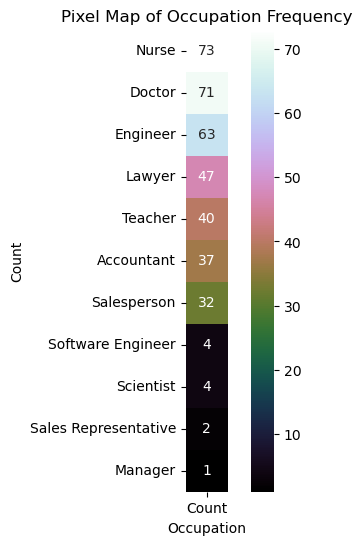

In [ ]:
counts = data["Occupation"].value_counts().to_frame(name="Count")

plt.figure(figsize=(6,6))
sns.heatmap(counts, cmap="cubehelix", annot=True, square=True)
plt.title("Pixel Map of Occupation Frequency")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

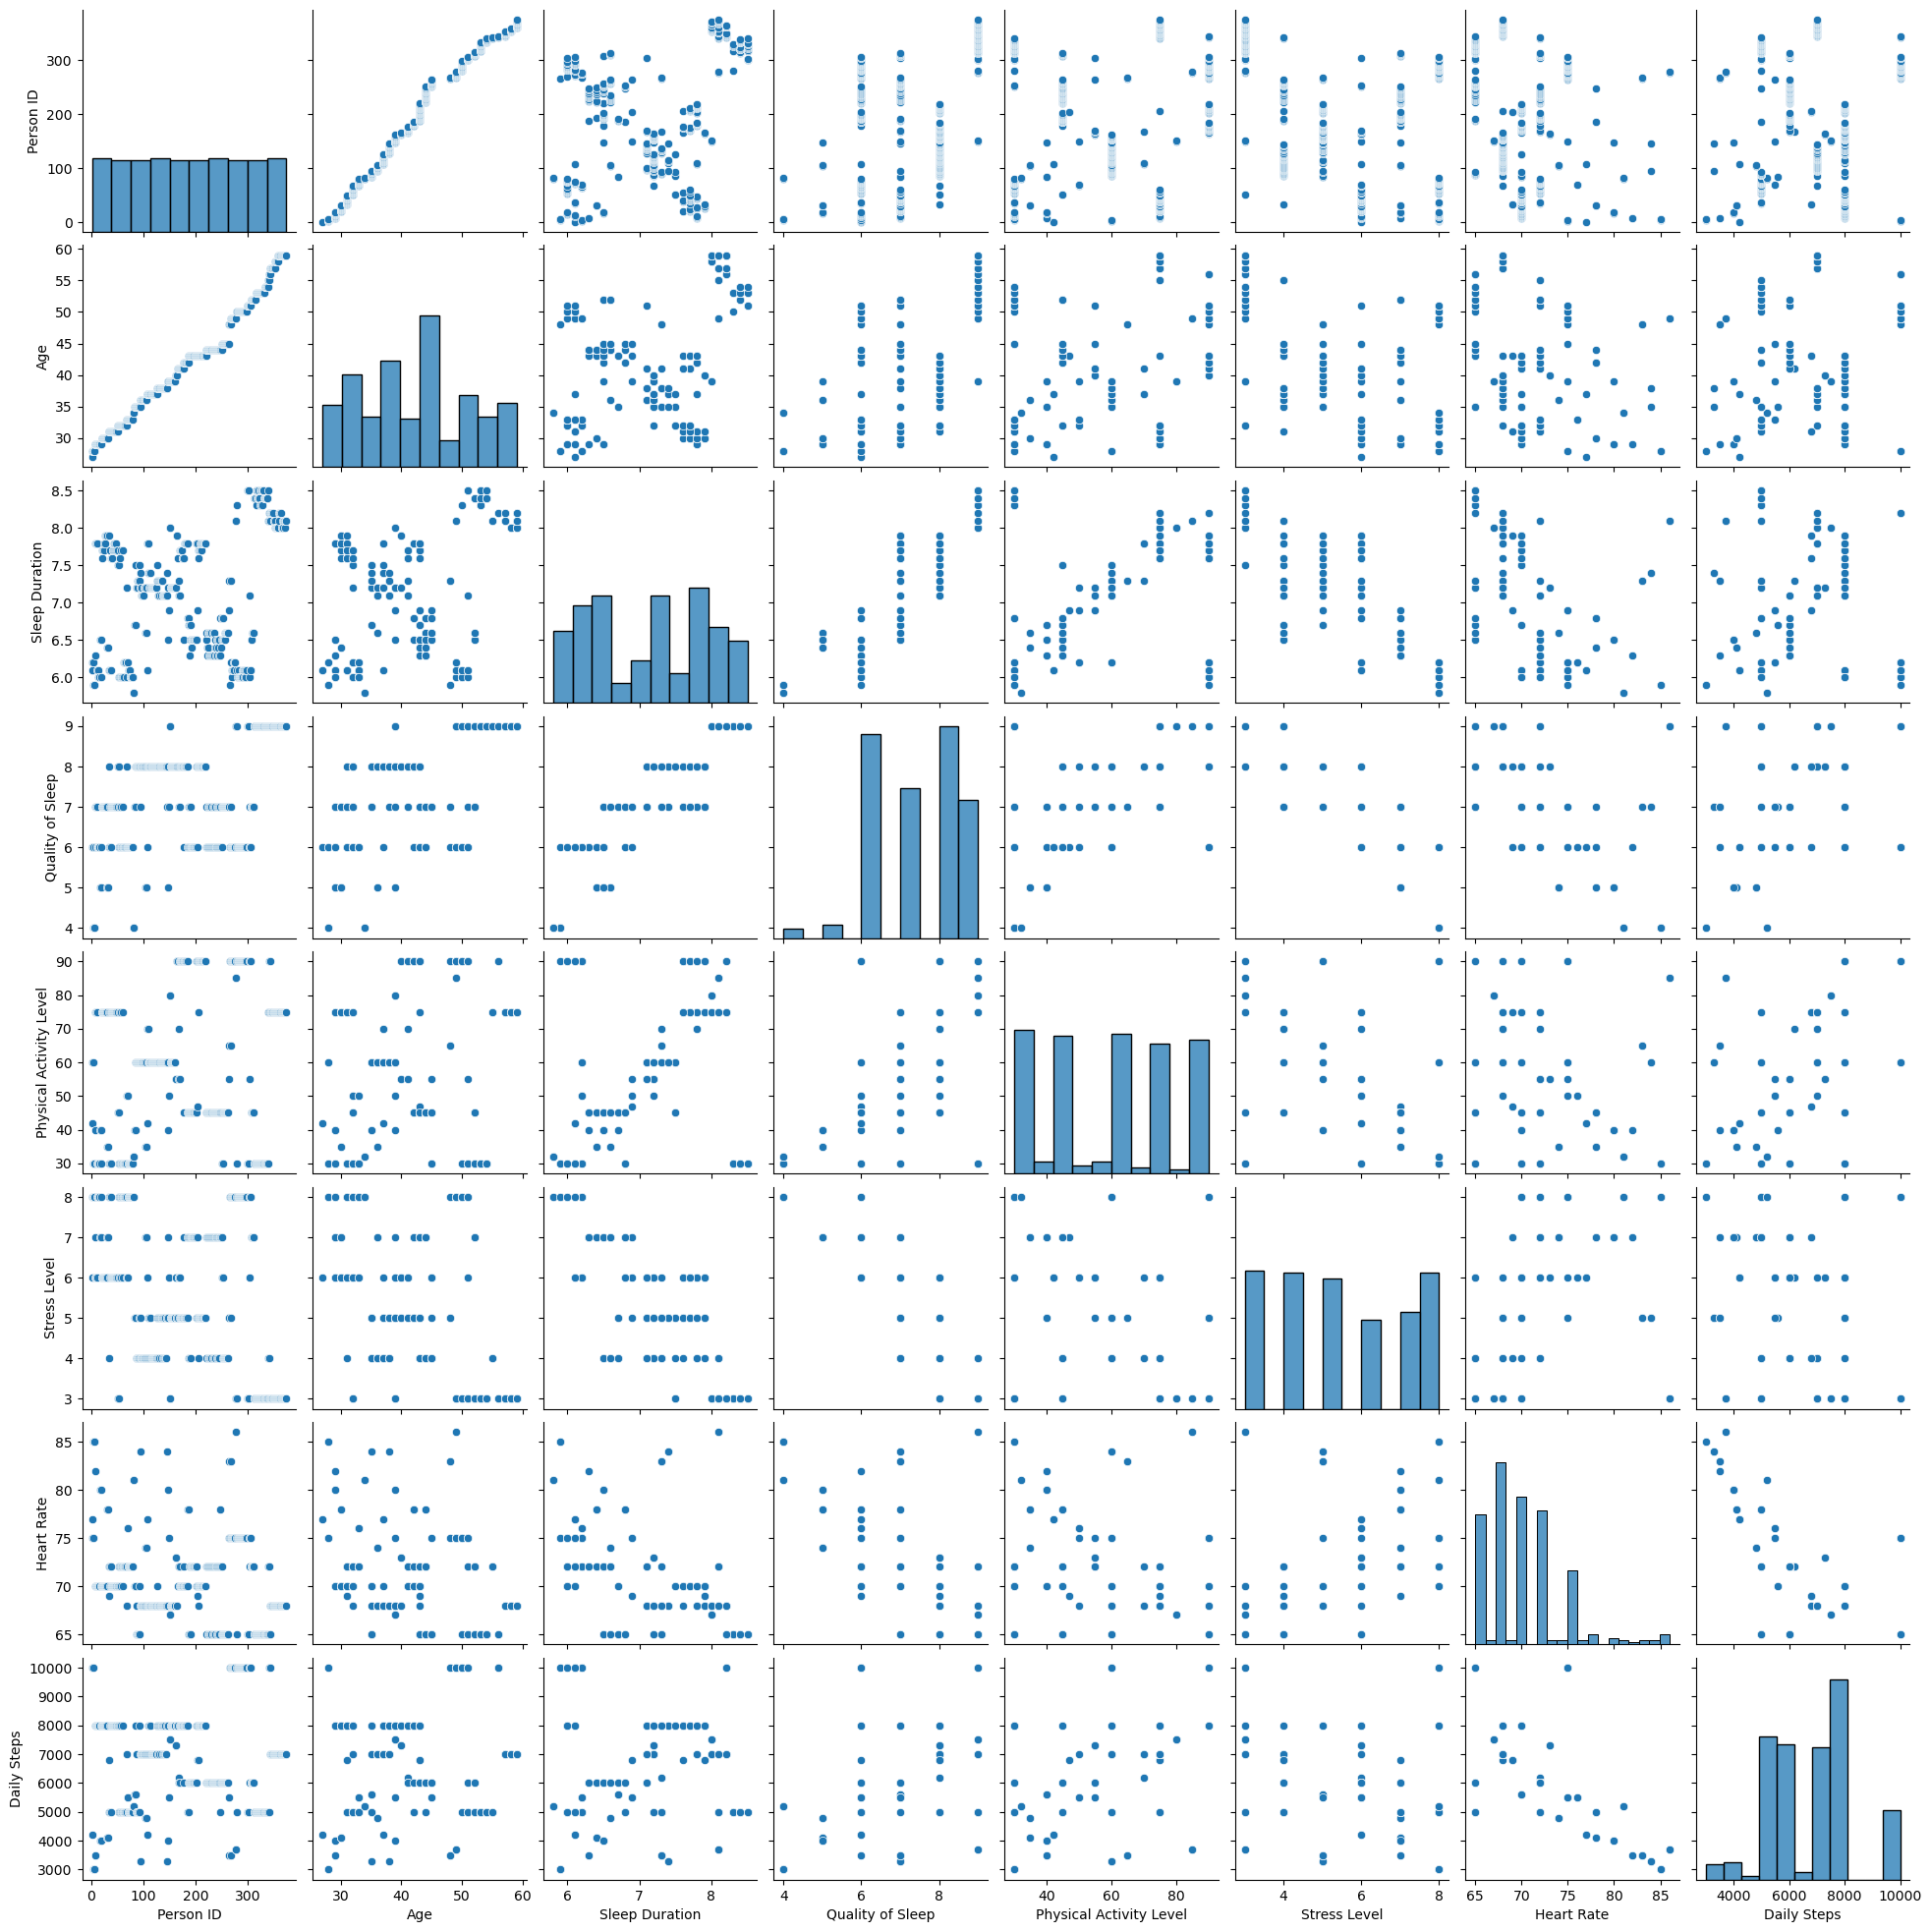

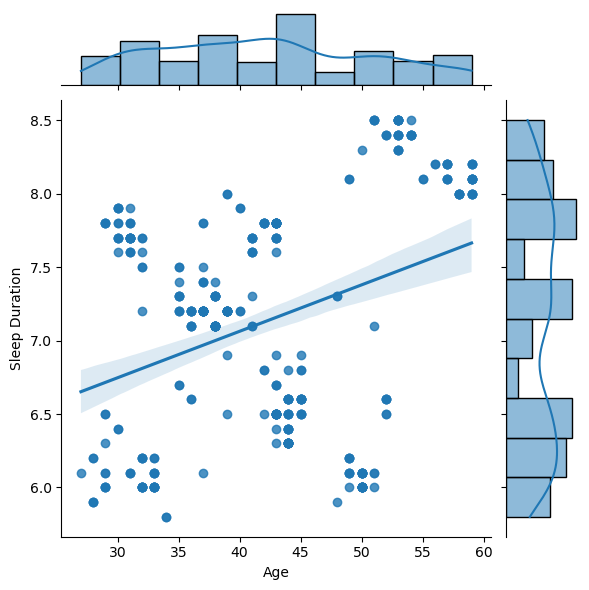

In [ ]:
sns.pairplot(data)
plt.show()

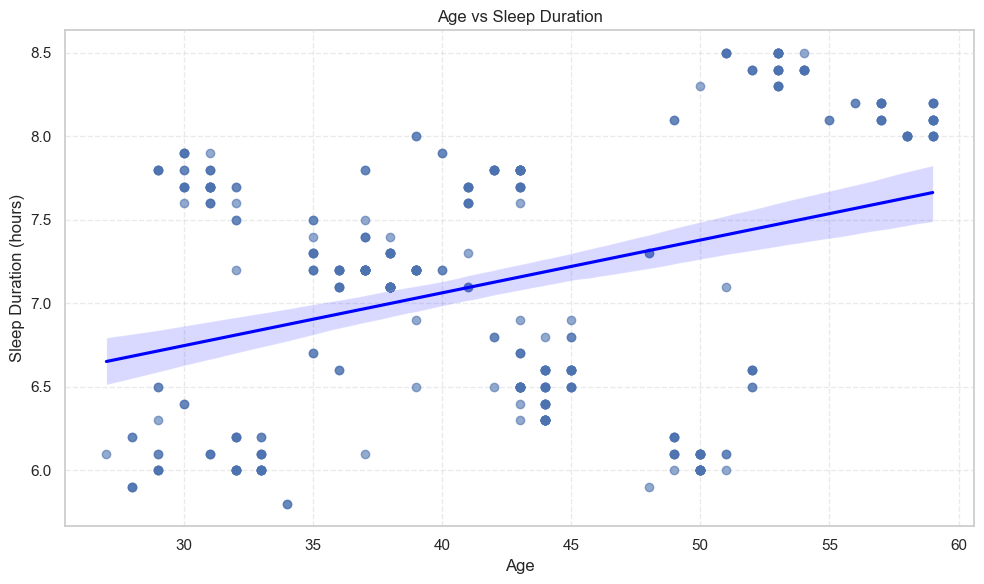

In [139]:
plt.figure(figsize=(10,6))

sns.regplot(
    data=data,
    x="Age",
    y="Sleep Duration",
    scatter_kws={"alpha":0.6},
    line_kws={"color": "blue"},
)

plt.title("Age vs Sleep Duration")
plt.xlabel("Age")
plt.ylabel("Sleep Duration (hours)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()